In [1]:
from classifiers import Swap_classifier, process
from prepare_state import quantum_state
from qiskit import Aer, IBMQ, execute
import numpy as np
import matplotlib.pyplot as plt

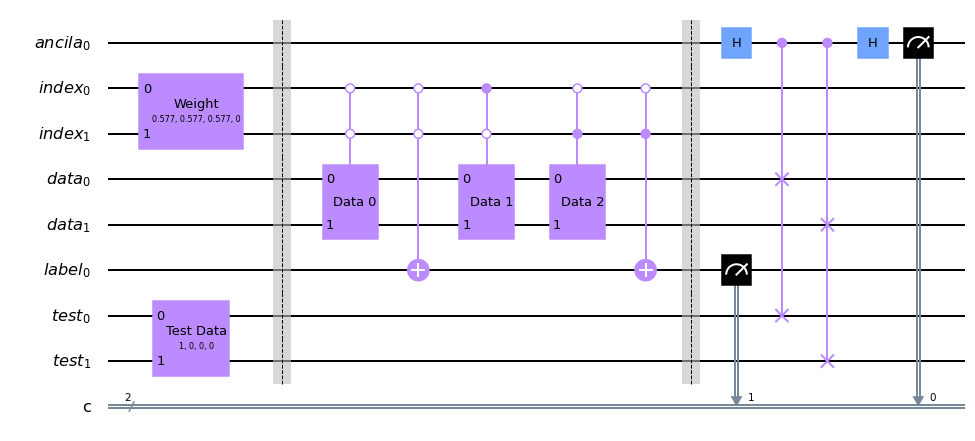

In [2]:
# toy test
x1 = [1, 1j, 0]
x2 = [1, -1j, 0]
x3 = [1, 1, 1]
label = [1, 0, 1]
weight = [1,1, 1]
test = [1,0, 0]

classifier = Swap_classifier(weight, [x1, x2, x3], label, test)
swap_qc = classifier.circuit()
swap_qc.draw('mpl')
#from qiskit import transpile
#transpile(swap_qc, basis_gates=['cx', 'h', 'cswap', 'rx', 'ry', 'rz']).draw('mpl')

In [3]:
n = 10
theta = np.linspace(0, np.pi, 100)
testset = np.array([np.sin(theta), 1j*np.cos(theta)]).transpose()
xset = np.random.rand(n, 2)+1j*np.random.rand(n, 2)
label = np.sign(np.abs(xset[:,0])**2 - np.abs(xset[:,1])**2).astype(int)
weight = np.ones(10)

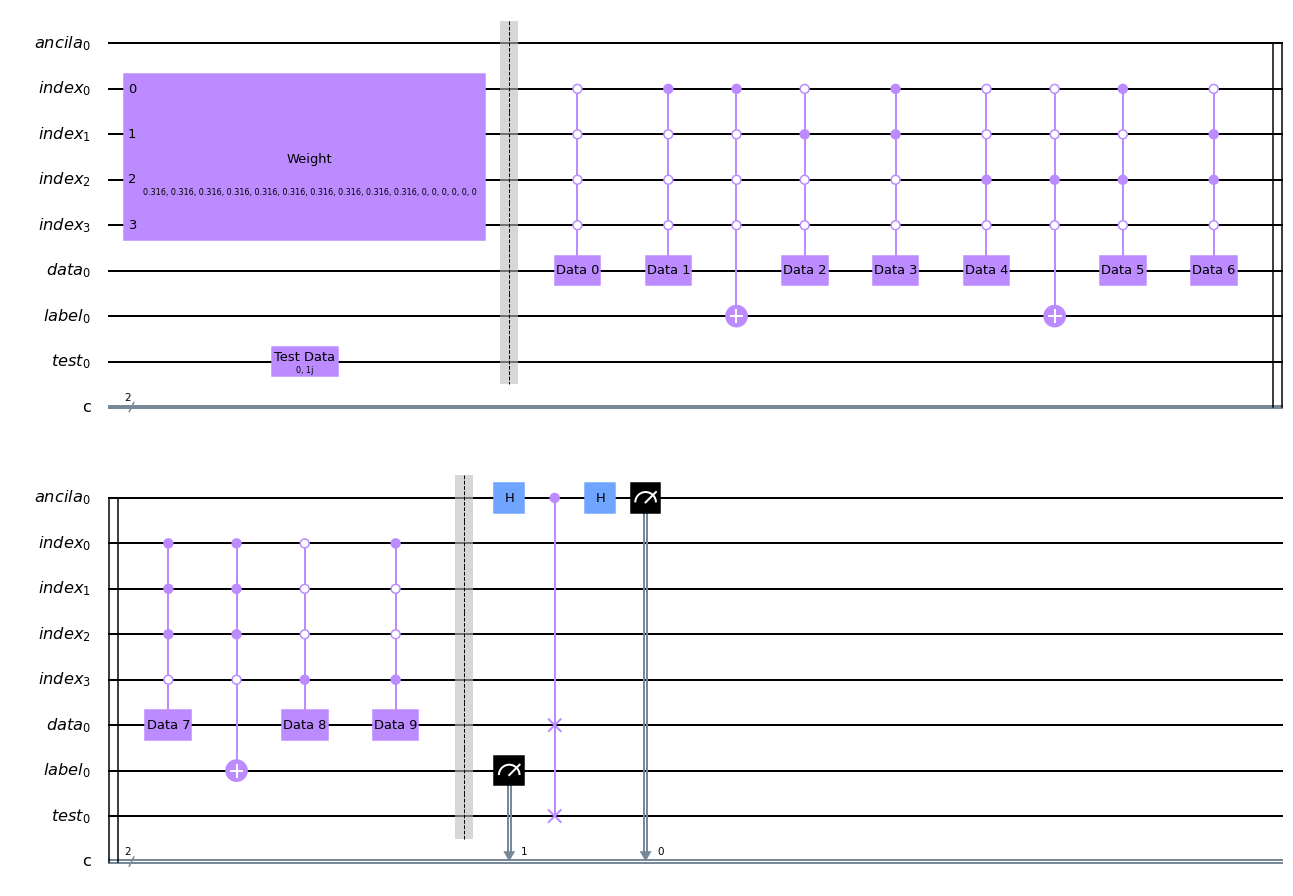

In [4]:
backend_simulator = Aer.get_backend('qasm_simulator')
qclist = [Swap_classifier(weight, xset, label, testset[i]).circuit() for i in range(len(theta))]
jobs = execute(qclist, backend=backend_simulator)
result = jobs.result().get_counts()
ZZval = [process(r) for r in result]
qclist[0].draw('mpl')

Text(0.5, 0, 'theta')

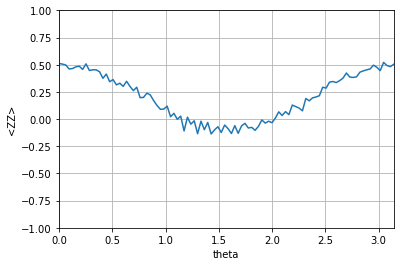

In [5]:
plt.plot(theta, ZZval)
plt.grid()
plt.ylim(-1, 1)
plt.xlim(min(theta), max(theta))
plt.ylabel('<ZZ>')
plt.xlabel('theta')